## quantitative analysis for META


In [1]:
from load import load_data
from indicators import indicators
from indicators import summary
from q_plot import quantiattive
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt

In [2]:
df=load_data(r'C:\Users\ASUS VIVO\Desktop\data\AAPL_historical_data.csv')

Prepare Your Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


Calculate Basic Technical Indicators

In [6]:
indicators(data=df,open='Open',high='High',low='Low',close='Close')


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.394498,...,210.110230,239.780637,226.482001,213.183366,235.351601,221.741000,208.130398,237.809121,224.228500,210.647878
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.765998,...,211.491707,239.264474,226.781502,214.298530,235.000833,221.939999,208.879166,237.449323,224.440500,211.431677
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.966498,...,212.195431,238.882617,226.969002,215.055387,234.736119,222.122999,209.509878,237.127285,224.633500,212.139714
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.025998,...,212.416808,238.525017,227.130502,215.735986,234.183635,222.395499,210.607362,236.168590,225.014500,213.860411


summary for the data

In [7]:
summary(data=df)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,RSI_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000,10979.000000,10984.000000,...,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000,10979.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546,22.143315,53.000637,...,20.829218,23.659829,22.382262,21.104695,23.219931,21.914913,20.609895,23.468992,22.157875,20.846757
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663,45.624027,12.821954,...,42.994437,48.719433,46.117324,43.547633,47.793147,45.168856,42.578331,48.316870,45.662784,43.041770
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000,0.056278,12.211546,...,0.048156,0.062208,0.056669,0.048470,0.061434,0.055999,0.043142,0.061434,0.055999,0.041562
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000,0.300000,43.639356,...,0.261662,0.334586,0.307031,0.269665,0.321194,0.293607,0.255698,0.328541,0.300642,0.261242
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000,0.529353,52.905375,...,0.483347,0.581422,0.538672,0.494926,0.567986,0.520759,0.475447,0.575268,0.530273,0.484215
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000,20.088384,62.653840,...,18.835469,21.546737,20.308991,19.127269,21.121252,19.835902,18.621453,21.367771,20.059625,18.824401
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000,225.380998,89.179692,...,213.899217,241.130999,227.271502,216.294526,236.658148,222.605499,211.438004,239.820553,225.117001,214.234202


In [8]:
column=summary(data=df).columns.tolist()
column

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'SMA_open',
 'RSI_open',
 'SMA_high',
 'RSI_high',
 'SMA_low',
 'RSI_low',
 'SMA_close',
 'RSI_close',
 'Upper_Band_open',
 'Middle_Band_open',
 'Lower_Band_open',
 'Upper_Band_high',
 'Middle_Band_high',
 'Lower_Band_high',
 'Upper_Band_low',
 'Middle_Band_low',
 'Lower_Band_low',
 'Upper_Band_close',
 'Middle_Band_close',
 'Lower_Band_close']

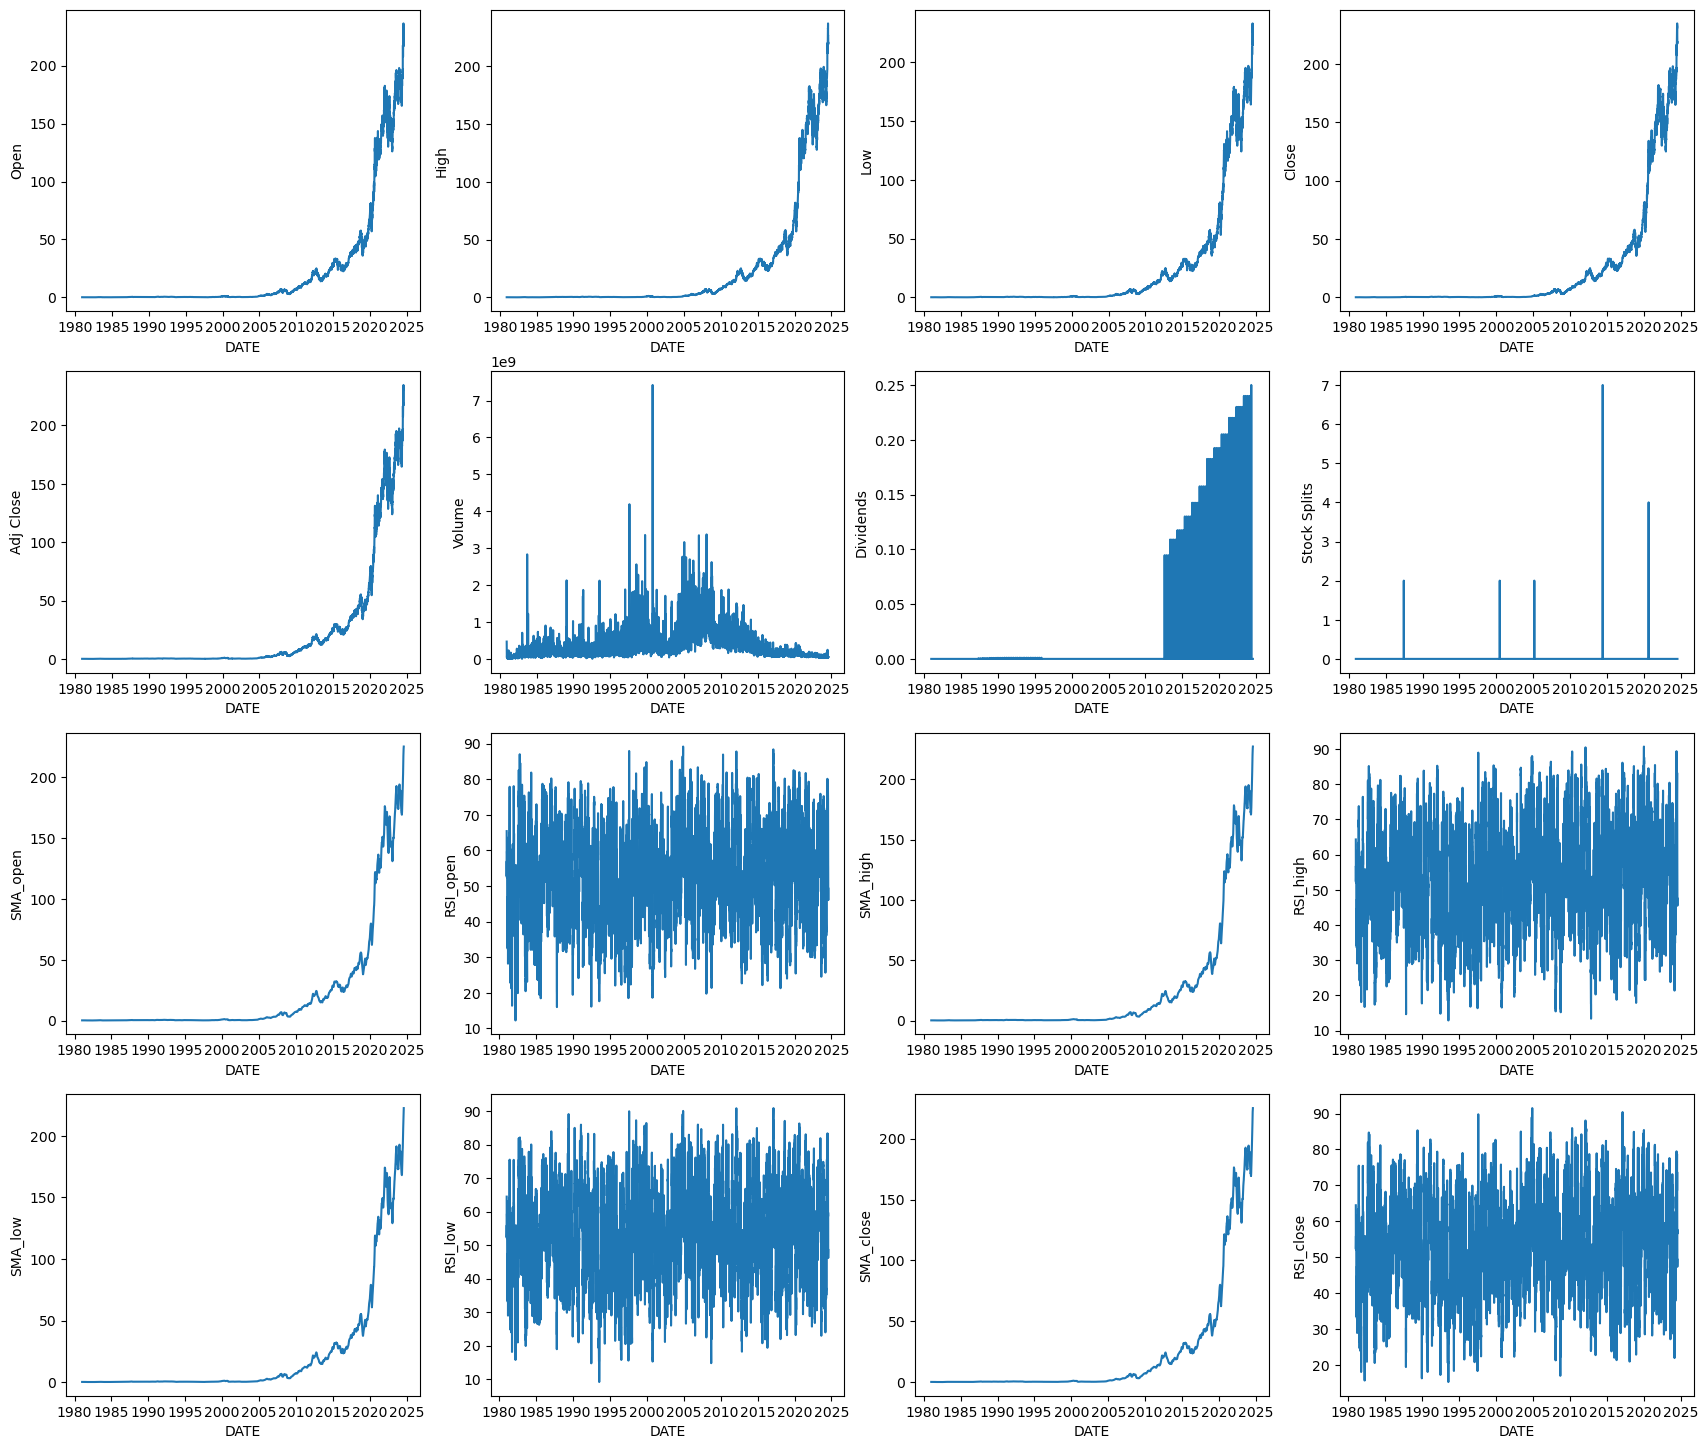

In [9]:
quantiattive(data=df,column=column)